In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config

In [262]:
from sklearn.datasets import fetch_california_housing

In [263]:
data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [264]:
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [265]:
data.corrwith(other = target,method = 'pearson')

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64

In [266]:
data.corrwith(other = target,method = 'kendall')

MedInc        0.495528
HouseAge      0.049822
AveRooms      0.179175
AveBedrms    -0.083489
Population    0.002172
AveOccup     -0.174370
Latitude     -0.109411
Longitude    -0.052495
dtype: float64

In [267]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
set_config(display = 'diagram')

In [268]:
model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [269]:
cv_results = cross_validate(model, data, target,scoring = 'neg_mean_squared_error', n_jobs = 2, cv = 10, return_train_score = True, return_estimator= True)

In [270]:
cv_results['estimator']

[Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 Pipelin

In [271]:
first_fold = cv_results['estimator'][0]
first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [272]:
for est in step:
    print(est)

PolynomialFeatures()
LinearRegression()


In [273]:
coeffs = []
for est in cv_results['estimator']:
    coeffs.append(est[-1].coef_ )

In [274]:
# for people who love list comprehensions
#coeffs = [est[-1].coef_ for est in cv_results['estimator']]

In [275]:
#getting feature names through PolyninomialFeatures()
feature_names = first_fold[0].get_feature_names(input_features = data.columns)
feature_names

['1',
 'MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedInc^2',
 'MedInc HouseAge',
 'MedInc AveRooms',
 'MedInc AveBedrms',
 'MedInc Population',
 'MedInc AveOccup',
 'MedInc Latitude',
 'MedInc Longitude',
 'HouseAge^2',
 'HouseAge AveRooms',
 'HouseAge AveBedrms',
 'HouseAge Population',
 'HouseAge AveOccup',
 'HouseAge Latitude',
 'HouseAge Longitude',
 'AveRooms^2',
 'AveRooms AveBedrms',
 'AveRooms Population',
 'AveRooms AveOccup',
 'AveRooms Latitude',
 'AveRooms Longitude',
 'AveBedrms^2',
 'AveBedrms Population',
 'AveBedrms AveOccup',
 'AveBedrms Latitude',
 'AveBedrms Longitude',
 'Population^2',
 'Population AveOccup',
 'Population Latitude',
 'Population Longitude',
 'AveOccup^2',
 'AveOccup Latitude',
 'AveOccup Longitude',
 'Latitude^2',
 'Latitude Longitude',
 'Longitude^2']

In [276]:
weight_data = pd.DataFrame(coeffs, columns = feature_names)

In [277]:
weight_data.head()

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
0,0.000020,-1140.478051,-98.735398,738.891246,-3694.264311,0.026004,119.975984,797.604954,602.115765,-3.350467,...,2.723364e-07,0.001898,0.002020,0.001252,0.009463,2.124956,1.801719,5.105701,9.521863,3.843453
1,0.000008,-1052.152469,-86.839209,634.803034,-3400.011535,-0.018349,279.105936,793.917971,405.165062,-3.177069,...,2.902984e-07,0.001441,0.001231,0.000569,0.015912,3.987531,3.653011,4.869199,9.361477,3.007598
2,0.000005,-1047.784036,-81.454227,566.113345,-2807.775314,0.040838,110.895680,964.710027,805.906156,-2.622063,...,3.059138e-07,0.001709,0.002302,0.001462,0.008302,1.967116,1.658570,6.592902,11.868451,5.076783
3,0.000005,-1191.834859,-91.891841,608.442786,-2977.418717,0.029125,125.399167,848.204538,541.626682,-3.221603,...,2.939819e-07,0.001828,0.002244,0.001362,0.008057,2.094999,1.815240,6.317023,10.662395,3.758923
4,0.000006,-1068.457293,-77.972734,742.832119,-3570.586805,0.060562,18.297959,985.426360,781.002570,-2.857276,...,-1.065780e-07,0.004502,0.002481,0.001733,0.002640,2.191904,0.839418,6.439938,11.955237,4.978589


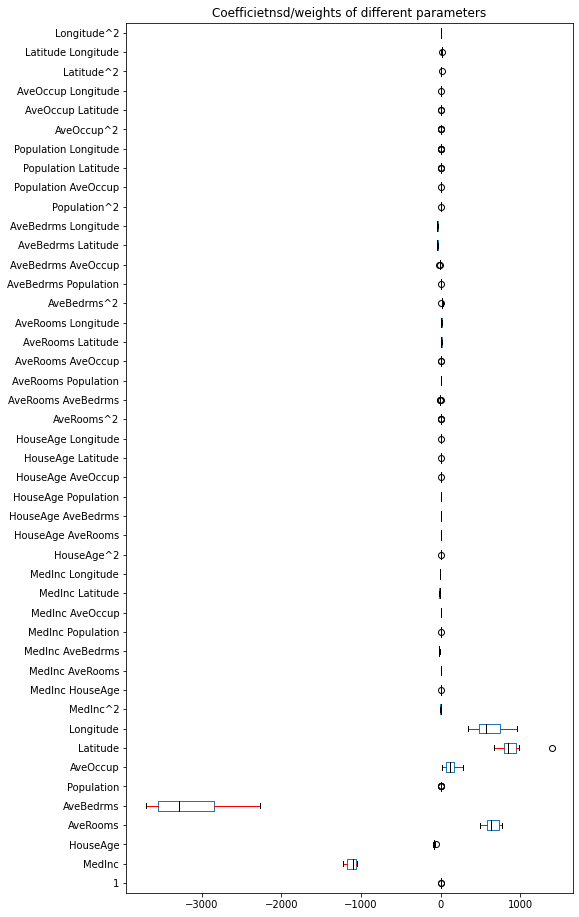

In [278]:
color = {"whiskers": "red", "medians": "black", "caps":"black"}
weight_data.plot.box(color = color,vert= False, figsize = (8,16))
_=plt.title('Coefficietnsd/weights of different parameters')

In [279]:
print(f"Trainset : {-cv_results['train_score'].mean():.2f} +/- {cv_results['train_score'].std():.2f}")

Trainset : 4190.21 +/- 151.12


In [280]:
print(f"Testset : {-cv_results['test_score'].mean():.2f} +/- {cv_results['test_score'].std():.2f}")

Testset : 13334.94 +/- 20292.68


# Regularization :
Forcing large positive or negative weights to shrink towards zero


In [281]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(degree = 2),Ridge(alpha = 1000))
cv_results = cross_validate(model, data, target,scoring = 'neg_mean_squared_error', n_jobs = 2, cv = 10, return_train_score = True, return_estimator= True)

In [282]:
weight_data.head()

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
0,0.000020,-1140.478051,-98.735398,738.891246,-3694.264311,0.026004,119.975984,797.604954,602.115765,-3.350467,...,2.723364e-07,0.001898,0.002020,0.001252,0.009463,2.124956,1.801719,5.105701,9.521863,3.843453
1,0.000008,-1052.152469,-86.839209,634.803034,-3400.011535,-0.018349,279.105936,793.917971,405.165062,-3.177069,...,2.902984e-07,0.001441,0.001231,0.000569,0.015912,3.987531,3.653011,4.869199,9.361477,3.007598
2,0.000005,-1047.784036,-81.454227,566.113345,-2807.775314,0.040838,110.895680,964.710027,805.906156,-2.622063,...,3.059138e-07,0.001709,0.002302,0.001462,0.008302,1.967116,1.658570,6.592902,11.868451,5.076783
3,0.000005,-1191.834859,-91.891841,608.442786,-2977.418717,0.029125,125.399167,848.204538,541.626682,-3.221603,...,2.939819e-07,0.001828,0.002244,0.001362,0.008057,2.094999,1.815240,6.317023,10.662395,3.758923
4,0.000006,-1068.457293,-77.972734,742.832119,-3570.586805,0.060562,18.297959,985.426360,781.002570,-2.857276,...,-1.065780e-07,0.004502,0.002481,0.001733,0.002640,2.191904,0.839418,6.439938,11.955237,4.978589


In [283]:
coeffs = []
for est in cv_results['estimator']:
    coeffs.append(est[-1].coef_ )
first_fold = cv_results['estimator'][0]
#as names of the features will not change
weight_data = pd.DataFrame(coeffs, columns = feature_names)

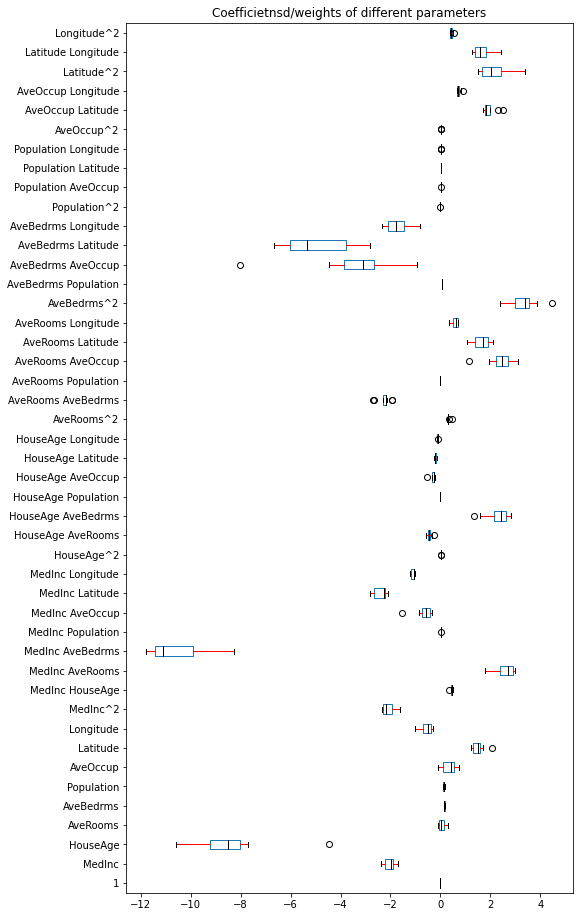

In [284]:

color = {"whiskers": "red", "medians": "black", "caps":"black"}
weight_data.plot.box(color = color,vert= False, figsize = (8,16))
_=plt.title('Coefficietnsd/weights of different parameters')

Notice how parameters are coming towards zero and are spread out in a smaller range that is because of hight valus of alpha

In [285]:
print(f"Trainset : {-cv_results['train_score'].mean():.2f} +/- {cv_results['train_score'].std():.2f}")

Trainset : 4410.74 +/- 159.05


In [286]:
print(f"Testset : {-cv_results['test_score'].mean():.2f} +/- {cv_results['test_score'].std():.2f}")

Testset : 5958.93 +/- 1855.64


# Scaling data + Regularizing with RidgeCV

In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [303]:
alphas = np.logspace(-2, 0, num=20)
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

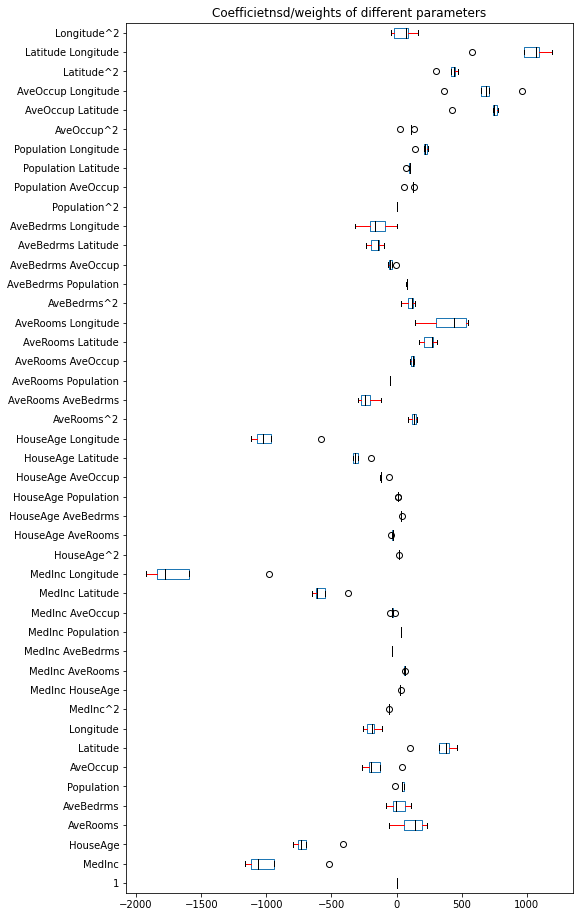

In [317]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(model, data, target,scoring = 'neg_mean_squared_error', 
                            n_jobs = 2, cv = cv, return_train_score = True, return_estimator= True)

coeffs = []
for est in cv_results['estimator']:
    coeffs.append(est[-1].coef_ )
first_fold = cv_results['estimator'][0]
#as names of the features will not change
weight_data = pd.DataFrame(coeffs, columns = feature_names)
weight_data.plot.box(color = color,vert= False, figsize = (8,16))
_=plt.title('Coefficietnsd/weights of different parameters')

In [318]:
print(f"Trainset : {-cv_results['train_score'].mean():.2f} +/- {cv_results['train_score'].std():.2f}")

Trainset : 4306.56 +/- 25.92


In [319]:
print(f"Testset : {-cv_results['test_score'].mean():.2f} +/- {cv_results['test_score'].std():.2f}")

Testset : 4348.66 +/- 252.92


In [320]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.010000,0.012743,0.016238,0.020691,0.026367,0.033598,0.042813,0.054556,0.069519,0.088587,0.112884,0.143845,0.183298,0.233572,0.297635,0.379269,0.483293,0.615848,0.784760,1.000000
0,7587.897141,7059.531216,6579.796667,6161.839629,5813.048345,5535.350138,5326.646369,5182.950517,5100.749049,5079.212663,5122.029454,5238.704149,5445.118890,5763.012259,6217.925433,6835.274126,7634.692137,8623.620241,9791.918443,11109.476019
1,7079.341771,6696.622046,6329.022308,5987.727181,5681.306000,5415.171818,5191.880969,5012.209177,4876.780585,4787.974274,4751.851652,4779.853646,4889.937328,5106.656625,5459.549144,5979.280717,6691.530974,7609.581815,8727.609953,10017.092899
2,24857.406605,21448.284772,18293.478416,15481.009011,13067.031991,11071.457116,9480.437579,8254.431555,7338.963939,6675.026438,6207.024331,5887.541169,5679.263698,5554.913823,5496.051755,5491.367683,5534.775517,5623.398006,5755.456140,5928.154410
3,7504.216958,7125.074257,6754.172985,6400.999897,6072.937965,5774.941819,5509.955509,5280.027720,5087.960263,4939.271829,4844.228092,4819.618117,4889.808854,5086.420585,5445.877349,6004.320850,6790.113763,7815.311733,9068.542918,10511.939341
4,6999.938808,6598.898743,6215.363499,5861.328579,5546.025773,5275.377052,5052.349007,4878.140850,4753.964890,4683.117084,4673.049960,4737.162496,4895.935124,5176.863333,5612.500529,6236.037942,7074.449338,8140.303978,9424.471281,10892.352852


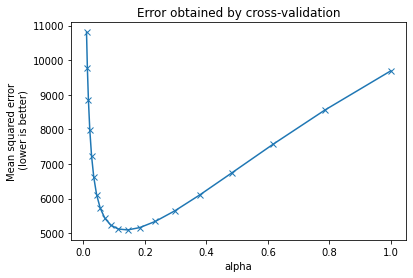

In [321]:
cv_alphas.mean(axis=0).plot(marker="x")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [322]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]